In [1]:
!pip install spectral

In [4]:
import tensorflow

In [6]:
tensorflow.__version__

'2.1.0'

In [9]:
import numpy as np
import pandas as pd 
import os
import gc
import matplotlib.pyplot as plt
from spectral import *
import seaborn as sns

%matplotlib inline

pal = sns.color_palette()
sns.set_style("whitegrid")

In [17]:
ls "C:\Users\Dor Meir\Google Drive\Learning_ML\ITC Program\Projects\final_project\adidas\01-data\meta\bangkok\"

 Volume in drive C is Windows
 Volume Serial Number is C6F9-3569

 Directory of C:\Users\Dor Meir\Google Drive\Learning_ML\ITC Program\Projects\final_project\adidas\01-data\meta\bangkok

23/05/2020  17:20    <DIR>          .
23/05/2020  17:20    <DIR>          ..
23/05/2020  17:20    <DIR>          database
23/05/2020  17:20    <DIR>          query
               0 File(s)              0 bytes
               4 Dir(s)   9,999,200,256 bytes free


In [10]:
directory = 'Samples'
for f in os.listdir(directory):
    if not os.path.isdir(directory+ '/' + f):
        print(f.ljust(30) + str(round(os.path.getsize(directory+ '/' + f) / 1000000, 2)) + 'MB')
    else:
        sizes = [os.path.getsize(directory+ '/' + f + '/' + x)/1000000 for x in os.listdir(directory+ '/' + f)]
        print(f.ljust(30) + str(round(sum(sizes), 2)) + 'MB' + ' ({} files)'.format(len(sizes)))


FileNotFoundError: [WinError 3] The system cannot find the path specified: 'Samples'

In [210]:
# create a dictionary with all the image names and sizes used for the model:
cities = ['bangkok', 'moscow', 'berlin']
data_dict = {}

# loop through all cities:
for city in cities:
    directory = 'Samples/'+ city
    data_dict[city] = {'files': [], 'sizes': []}
    
    for f in os.listdir(directory):
        if not os.path.isdir(directory+ '/' + f):
            # get image name:
            data_dict[city]['files'].append(f)
            # get image size:
            data_dict[city]['sizes'].append(os.path.getsize(directory+ '/' + f) / 1000000)

# todo's 

- filter metadata so we have only the meta data of the images we use 
- EDA on metadata
- EDA in pictures: Sizes, color?, structure
- Preprocessing: label picture according to type (urban, vegetation, road/highwigh, rural)

https://www.kaggle.com/jpmiller/basic-eda-with-images/notebook
https://www.kaggle.com/cc786537662/initial-eda-image-processing

# Metadata:

In [211]:
# load all metadata:
directory = 'Samples/meta'
li = []
tp = ['raw', 'seq_info', 'subtask_index', 'postprocessed']
meta_dict = {}

for t in tp:
    meta_temp = []
    for f in os.listdir(directory):
        # add all types of meta data
 
        if f.endswith(t + '.csv'):

            # exctract information:
            filename = f.split('.')[0].split('_')
            city = filename[0]
            db = filename[1]
            kind = filename[2] 
            # load data:
            data = pd.read_csv(directory+ '/' + f)
            data['city'] = city
            data['db'] = db
            data['kind']= kind
            meta_temp.append(data)

    meta_dict[t] = pd.concat(meta_temp, axis=0, sort=False)

In [212]:
keys = list(meta_dict.keys())
keys

['raw', 'seq_info', 'subtask_index', 'postprocessed']

In [215]:
metadata = meta_dict[keys[0]].drop(columns=['kind', 'Unnamed: 0'])

for key in keys[1:]:
    metadata = metadata.merge(meta_dict[key].drop(columns=['kind', 'Unnamed: 0']), how='outer', on=['key', 'city', 'db'])
    
# save as csv
metadata.to_csv('metadata.csv', index=False)

In [194]:
metadata.head()

,key,lon,lat,ca,captured_at,pano,city,db,sequence_key,frame_number,...,n2d,o2n,n2o,all,easting,northing,unique_cluster,control_panel,night,view_direction
0,1Zo_7pjS6hwhRKqy0P5dRA,13.325139,52.458353,36.0,2015-08-01,False,tlx,database,DPD2-qP1OmP9RAc7SUFsRQ,316,...,False,False,False,True,386202.043829,5.813338e+06,0,False,False,Forward
1,SgMdB3l1KjkiOCi66B2_-Q,13.325219,52.458431,36.0,2015-08-01,False,tlx,database,DPD2-qP1OmP9RAc7SUFsRQ,317,...,False,False,False,True,386207.713584,5.813347e+06,0,False,False,Forward
2,XrUp0yR583OMfbzmk0qJtA,13.325306,52.458503,38.0,2015-08-01,False,tlx,database,DPD2-qP1OmP9RAc7SUFsRQ,318,...,False,False,False,True,386213.756137,5.813355e+06,0,False,False,Forward
3,4rL3324h3ardVSjPN03xOg,13.325381,52.458578,33.0,2015-08-01,False,tlx,database,DPD2-qP1OmP9RAc7SUFsRQ,319,...,False,False,False,True,386219.044968,5.813363e+06,0,False,False,Forward
4,YU3M7re8l-bQnuDB2QElbg,13.325453,52.458656,35.0,2015-08-01,False,tlx,database,DPD2-qP1OmP9RAc7SUFsRQ,320,...,False,False,False,True,386224.150771,5.813372e+06,0,False,False,Forward


In [195]:
metadata.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 357785 entries, 0 to 357784
Data columns (total 23 columns):
key               357785 non-null object
lon               357785 non-null float64
lat               357785 non-null float64
ca                357785 non-null float64
captured_at       357785 non-null object
pano              357785 non-null bool
city              357785 non-null object
db                357785 non-null object
sequence_key      357785 non-null object
frame_number      357785 non-null int64
w2s               357785 non-null bool
s2w               357785 non-null bool
d2n               357785 non-null bool
n2d               357785 non-null bool
o2n               357785 non-null bool
n2o               357785 non-null bool
all               357785 non-null bool
easting           357785 non-null float64
northing          357785 non-null float64
unique_cluster    357785 non-null int64
control_panel     357785 non-null bool
night             357785 non-null bool
view

In [196]:
metadata.describe()

,lon,lat,ca,frame_number,easting,northing,unique_cluster
count,357785.000000,357785.000000,357785.000000,357785.000000,357785.000000,3.577850e+05,357785.000000
mean,52.967356,41.614368,178.596299,162.457336,489575.543066,4.611111e+06,1060.607225
std,33.939458,19.180496,101.817749,175.516689,123854.616807,2.127360e+06,822.968738
min,13.277728,13.555386,0.000000,0.000000,382989.124462,1.499078e+06,0.000000
25%,37.466439,13.822536,91.800314,48.000000,403712.660086,1.528574e+06,409.000000
50%,37.604787,52.574486,184.391265,109.000000,412208.663823,5.826125e+06,863.000000
75%,100.451221,55.697825,270.757065,224.000000,656837.112613,6.173386e+06,1569.000000
max,100.789569,55.867390,359.970147,2931.000000,693596.444942,6.192393e+06,3104.000000


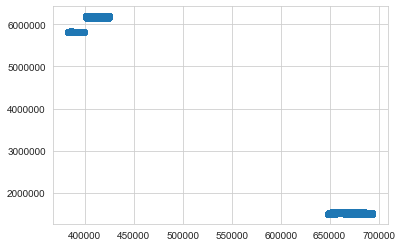

<Figure size 1080x1080 with 0 Axes>

In [197]:
plt.scatter(metadata.easting, metadata.northing)
plt.figure(figsize=(15,15))
plt.show()

In [204]:
cat_feat =  ['control_panel', 'night', 'view_direction', 'city', 'db']

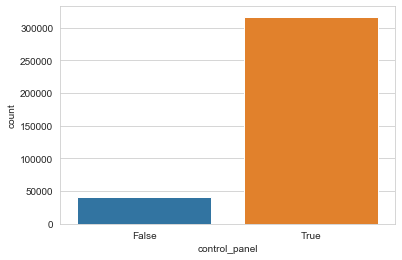

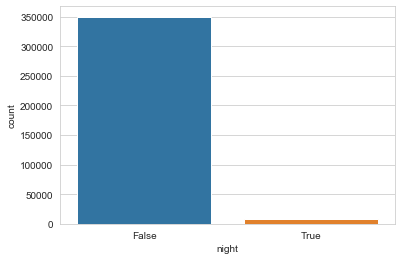

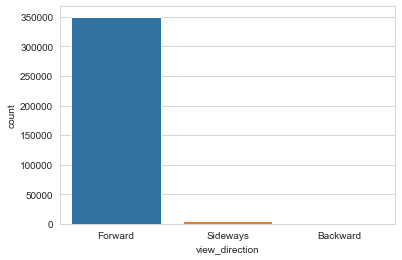

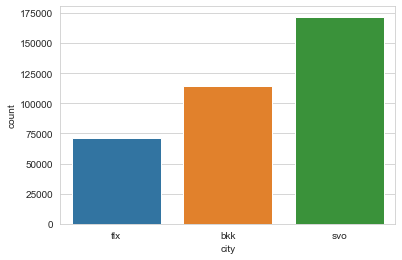

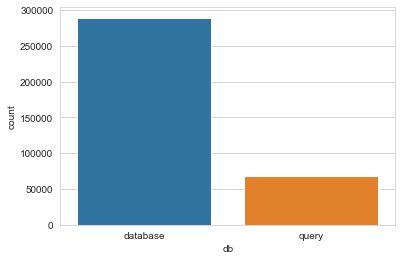

In [205]:
for cat in cat_feat:
    sns.countplot(x=cat, data=metadata)
    plt.show()

# ideas

Image format specific

- (Minimum / Median / Mean / Maximum) (width / height / area)
- Image formats
- Timestamps
- Exiff meta data

Image/ML specific

Things you can do with images:

- Compute the mean image
- Mean image by class
- Eigenfaces (or rather "Eigenimages")
- Fisher-Faces